In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
import seaborn as sb 
import numpy as np
import random
import cmdstanpy
import arviz as az

In [3]:
F = len('Roman')
L = len('Dembrovskyi')

In [4]:
stan_model = cmdstanpy.CmdStanModel(stan_file='bern_1.stan')
print(stan_model)

INFO:cmdstanpy:found newer exe file, not recompiling


CmdStanModel: name=bern_1
	 stan_file=C:\Users\Roman\Documents\Data_science\Lab_2\bern_1.stan
	 exe_file=C:\Users\Roman\Documents\Data_science\Lab_2\bern_1.exe
	 compiler_options=stanc_options={}, cpp_options={}


In [5]:
samples = stan_model.sample(data = {'M':F},chains=1)    

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,61.710400,61.0,74.0,67.0,69.0,47.0
1,0.0,0.0,0.407365,0.0,0.0,2.0,1.0,1.0
2,0.0,0.0,110.941000,113.0,113.0,115.0,108.0,110.0
3,0.0,0.0,140.160000,151.0,138.0,125.0,128.0,141.0
4,0.0,0.0,45.422200,36.0,48.0,51.0,39.0,51.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,29.211500,25.0,20.0,32.0,42.0,32.0
996,0.0,0.0,124.953000,145.0,114.0,126.0,126.0,102.0
997,0.0,0.0,24.046300,19.0,21.0,17.0,27.0,29.0
998,0.0,0.0,148.668000,147.0,137.0,149.0,133.0,162.0


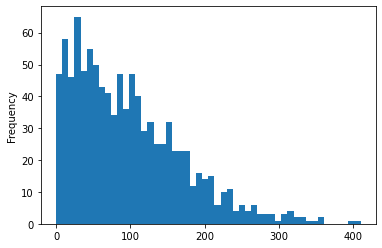

In [7]:
stats = df['lambda']
stats.plot.hist(bins=50)
plt.show()

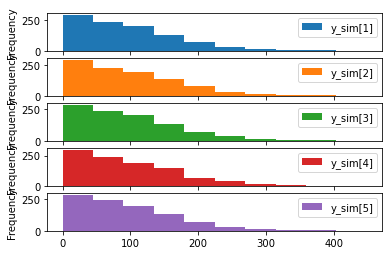

In [8]:
df2=df.loc[:, ~df.columns.isin(['lp__', 'accept_stat__','lambda'])]
df2.plot.hist(subplots=True)
plt.show()

In [9]:
stan_model = cmdstanpy.CmdStanModel(stan_file='code_2.stan')
stan_model_2 = cmdstanpy.CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
sample_1 = stan_model.sample(data = {'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
sample_2 = stan_model_2.sample(data = {'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


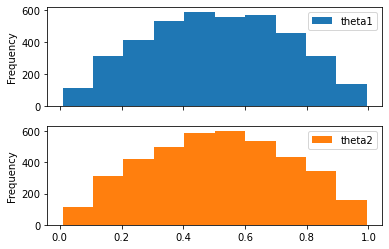

In [12]:
theta1 = sample_1.stan_variable('theta')
theta2 = sample_2.stan_variable('theta')
df = pd.DataFrame({'theta1':theta1,'theta2':theta2})
df.plot.hist(subplots=True)
plt.show()

In [14]:
stan_model = cmdstanpy.CmdStanModel(stan_file='code_4.stan')
stan_model_2 = cmdstanpy.CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [19]:
out1 = stan_model.sample(output_dir='samples',iter_sampling=7000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██        | 00:00 Iteration: 1400 / 8000 [ 17%]  (Sampling)


chain 1 |████▏     | 00:00 Iteration: 3100 / 8000 [ 38%]  (Sampling)


chain 1 |██████▏   | 00:00 Iteration: 4800 / 8000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 6800 / 8000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [20]:
out1.diagnose()

"Processing csv files: C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_4-20220313122115_1.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_4-20220313122115_2.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_4-20220313122115_3.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_4-20220313122115_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9837 of 28000 (35.13%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

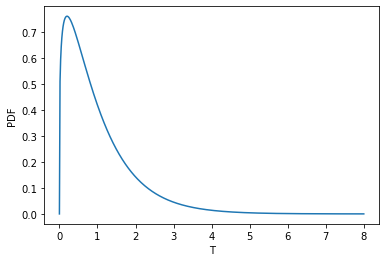

In [30]:
N=500
xs = np.linspace(0,8,N)
pdfs = scipy.stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)
plt.plot(xs, pdfs)
plt.gca().set_xlabel("T")
plt.gca().set_ylabel("PDF")
plt.show()

In [32]:
out2 = stan_model_2.sample(output_dir='samples',iter_sampling=7000)
out2.diagnose()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▍       | 00:00 Iteration: 1700 / 8000 [ 21%]  (Sampling)


chain 1 |█████     | 00:00 Iteration: 3800 / 8000 [ 47%]  (Sampling)


chain 1 |███████▌  | 00:00 Iteration: 5900 / 8000 [ 73%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_5-20220313125138_1.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_5-20220313125138_2.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_5-20220313125138_3.csv, C:\\Users\\Roman\\Documents\\Data_science\\Lab_2\\samples\\code_5-20220313125138_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 28000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

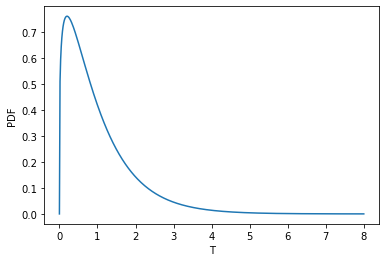

In [33]:
N=500
xs = np.linspace(0,8,N)
pdfs = scipy.stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)
plt.plot(xs, pdfs)
plt.gca().set_xlabel("T")
plt.gca().set_ylabel("PDF")
plt.show()

In [36]:
stan_model = cmdstanpy.CmdStanModel(stan_file='code_6.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [42]:
F = len('Roman')
L = len('Dembrovskyi')
y0 = 1

data = {'y_guess':[y0], 'theta':[(F+L)/2]}
out = stan_model.sample(data=data)
out.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,3.1058
1,0.0,0.0,3.1058
2,0.0,0.0,3.1058
3,0.0,0.0,3.1058
4,0.0,0.0,3.1058
...,...,...,...
3995,0.0,0.0,3.1058
3996,0.0,0.0,3.1058
3997,0.0,0.0,3.1058
3998,0.0,0.0,3.1058


In [45]:
out1 = cmdstanpy.CmdStanModel(stan_file='code_7.stan')
out_target = cmdstanpy.CmdStanModel(stan_file='code_8.stan')
out_target_incr = cmdstanpy.CmdStanModel(stan_file='code_9.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [46]:
data = {'N': F}
sample_1 = out1.sample(data=data)
sample_2 = out_target.sample(data=data)
sample_3 = out_target_incr.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


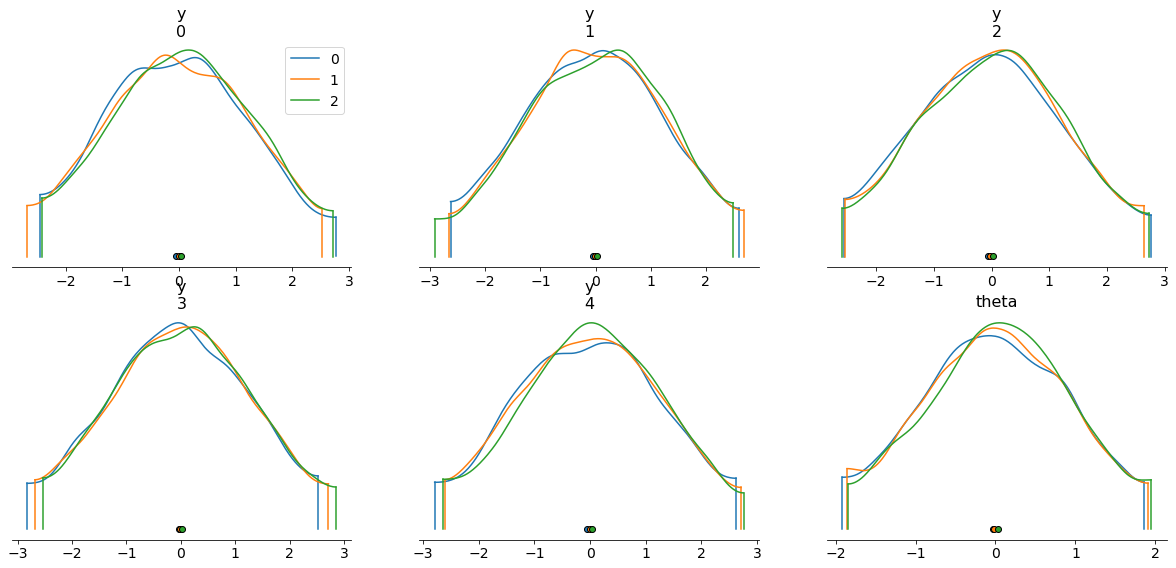

In [47]:
az.plot_density([sample_1,sample_2,sample_3])
plt.show()

In [49]:
model_gen = cmdstanpy.CmdStanModel(stan_file='code_10.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [59]:
mean_y = model_gen.generate_quantities(data=data, mcmc_sample = sample_2)


INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing


In [65]:
df = mean_y.draws_pd()

<AxesSubplot:ylabel='Frequency'>

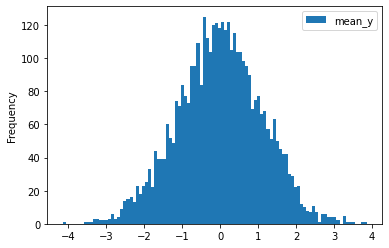

In [67]:
df.plot.hist(bins=100)